In [1]:
import os
print(os.getcwd())


C:\Users\PC


In [2]:
import pandas as pd

df = pd.read_excel('data.xlsx')  
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [3]:
df.isnull().sum()  


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
import pandas as pd



# 1. Fill missing string values with 'Unknown' or 'Not Available'
df.loc[:, 'director'] = df['director'].fillna('Unknown')
df.loc[:, 'cast'] = df['cast'].fillna('Unknown')
df.loc[:, 'country'] = df['country'].fillna('Unknown')
df.loc[:, 'date_added'] = df['date_added'].fillna('Not Available')
df.loc[:, 'duration'] = df['duration'].fillna('Unknown')

# 2. Fill missing rating with most frequent value (mode)
mode_rating = df['rating'].mode()[0]
df.loc[:, 'rating'] = df['rating'].fillna(mode_rating)

# 3. Check if anything is still missing
print("✅ Missing values handled. Remaining null values per column:")
print(df.isnull().sum())


✅ Missing values handled. Remaining null values per column:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [3]:
# Check and drop duplicates
import pandas as pd
df = pd.read_excel('data.xlsx')
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicate rows: 0


In [8]:
import pandas as pd

# Step 1: Load the Excel file
df = pd.read_excel('data.xlsx')

# Step 2: Clean the 'date_added' column
df['date_added'] = df['date_added'].astype(str).str.strip()

# Step 3: Convert to datetime, invalid ones become NaT
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Step 4: Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Step 5: Show the first few rows
print(df[['date_added', 'year_added', 'month_added']].head(10))


  date_added  year_added  month_added
0 2021-09-25      2021.0          9.0
1 2021-09-24      2021.0          9.0
2 2021-09-24      2021.0          9.0
3 2021-09-24      2021.0          9.0
4 2021-09-24      2021.0          9.0
5 2021-09-24      2021.0          9.0
6 2021-09-24      2021.0          9.0
7 2021-09-24      2021.0          9.0
8 2021-09-24      2021.0          9.0
9 2021-09-24      2021.0          9.0


In [13]:
import pandas as pd
df = pd.read_excel('data.xlsx')

# View column names to ensure 'country' exists
print(df.columns)

# Clean 'country' column if it exists
if 'country' in df.columns:
    df['country'] = df['country'].astype(str).str.lower().str.strip()
    print(df['country'].head(10))  # Shows first 10 rows of the cleaned 'country' column
else:
    print("Column 'country' not found.")

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
0                                        united states
1                                         south africa
2                                                  nan
3                                                  nan
4                                                india
5                                                  nan
6                                                  nan
7    united states, ghana, burkina faso, united kin...
8                                       united kingdom
9                                        united states
Name: country, dtype: object


In [8]:
import pandas as pd

# Load original data
df = pd.read_excel("data.xlsx")

# Make changes (example: drop missing values)
df.dropna(inplace=True)

# Save cleaned data
df.to_excel("C:/Users/PC/Desktop/cleaned_netflix_data.xlsx", index=False)
print("File saved to Desktop successfully!")

File saved to Desktop successfully!


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better visuals
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the cleaned Excel file
df = pd.read_excel("C:/Users/PC/Desktop/cleaned_netflix_data.xlsx")


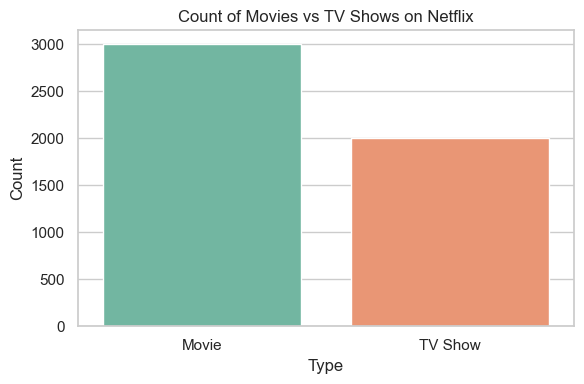

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample Data: Replace with your actual Series
# Example: type_counts = df['type'].value_counts()
type_counts = pd.Series([3000, 2000], index=['Movie', 'TV Show'])

# Plotting with fixed hue and palette usage
plt.figure(figsize=(6, 4))
sns.barplot(
    x=type_counts.index,
    y=type_counts.values,
    hue=type_counts.index,         # assigning x to hue
    palette="Set2",
    legend=False                   # disables legend (not needed here)
)

plt.title("Count of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


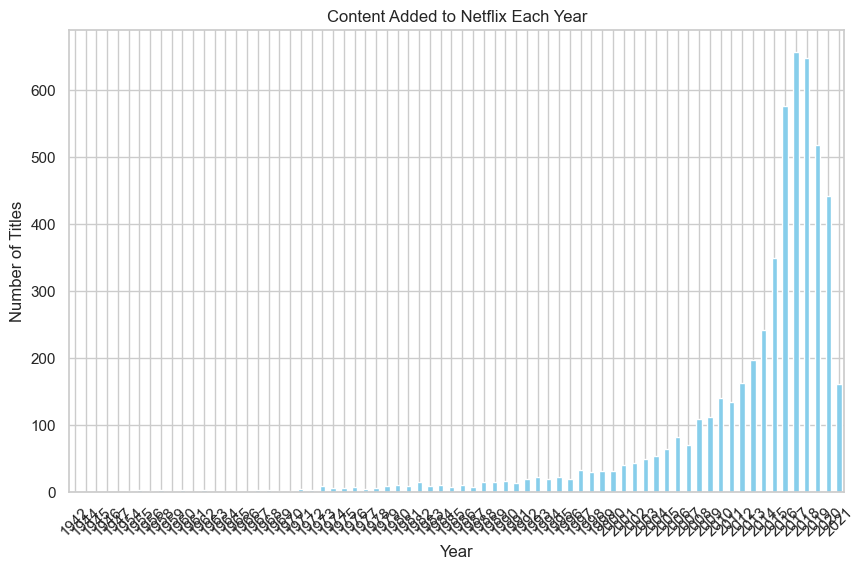

In [14]:
# Drop rows with missing year if any
df = df.dropna(subset=['release_year'])

# Count how many shows/movies added per year
year_counts = df['release_year'].value_counts().sort_index()

# Plot
year_counts.plot(kind='bar', color='skyblue')
plt.title("Content Added to Netflix Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


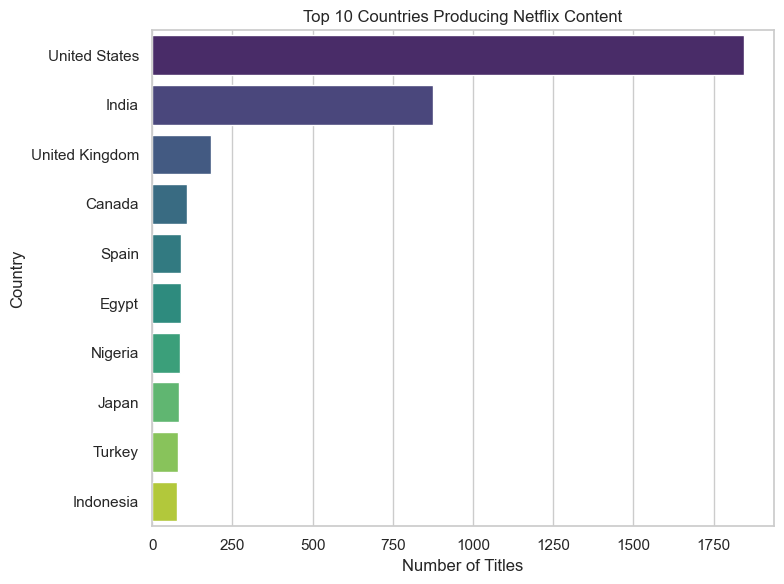

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it's already loaded

# Step 1: Group by country and get top 10
country_counts = df['country'].value_counts().head(10)

# Step 2: Prepare data for plotting (convert Series to DataFrame)
country_df = country_counts.reset_index()
country_df.columns = ['country', 'count']

# Step 3: Plot using hue and palette properly
plt.figure(figsize=(8, 6))
sns.barplot(
    data=country_df,
    x='count',
    y='country',
    hue='country',           # assigning hue for future compatibility
    palette='viridis',
    legend=False             # hide duplicate legend
)

plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


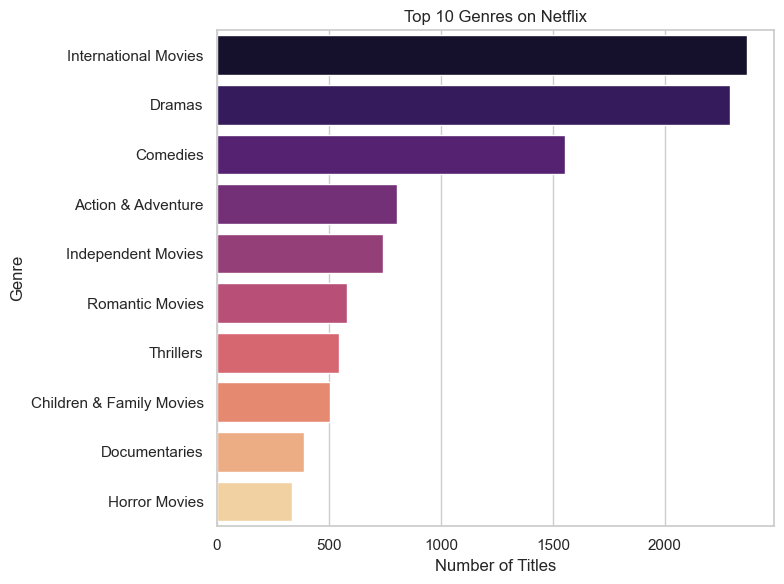

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Split multiple genres
genres = df['listed_in'].dropna().str.split(', ')
flat_list = [genre for sublist in genres for genre in sublist]

# Step 2: Count and get top 10
genre_counts = pd.Series(Counter(flat_list)).sort_values(ascending=False).head(10)

# Step 3: Convert to DataFrame
genre_df = genre_counts.reset_index()
genre_df.columns = ['genre', 'count']

# Step 4: Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=genre_df,
    x='count',
    y='genre',
    hue='genre',
    palette='magma',
    legend=False
)

plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


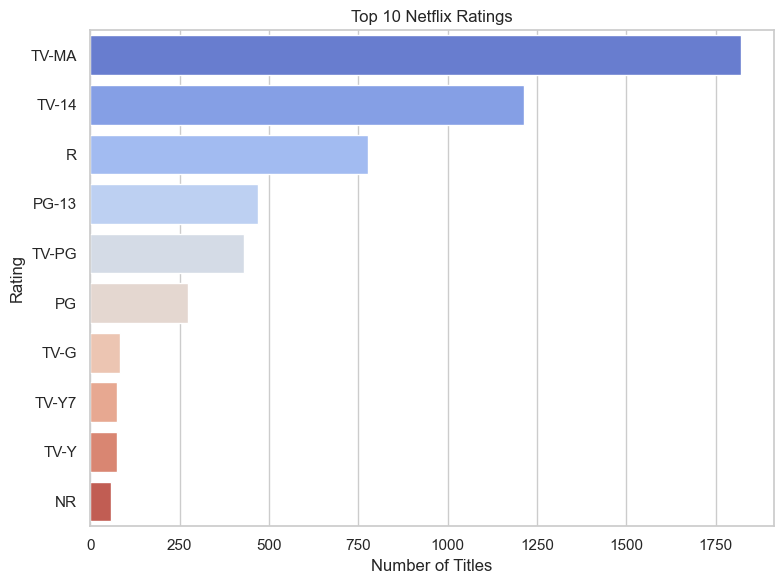

In [19]:
# Step 1: Get top 10 rating counts
rating_counts = df['rating'].value_counts().head(10)

# Step 2: Convert to DataFrame
rating_df = rating_counts.reset_index()
rating_df.columns = ['rating', 'count']

# Step 3: Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=rating_df,
    x='count',
    y='rating',
    hue='rating',
    palette='coolwarm',
    legend=False
)

plt.title("Top 10 Netflix Ratings")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


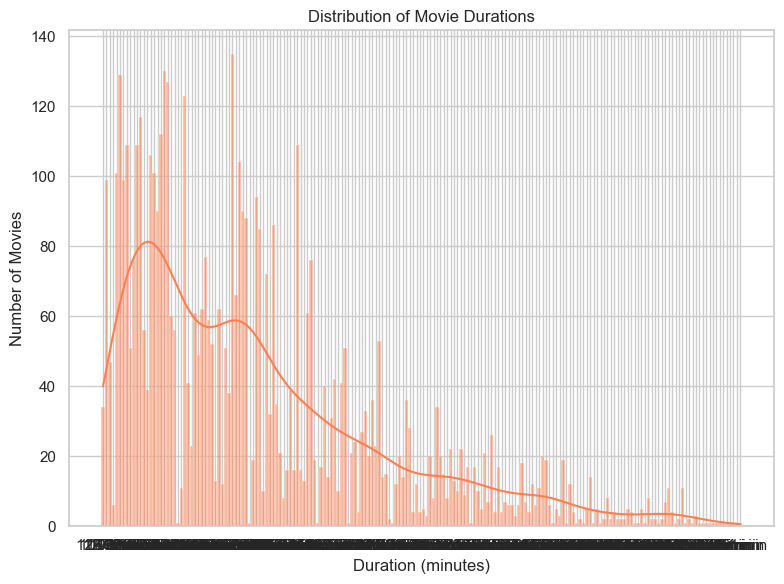

In [21]:
# Step 1: Filter for Movies
movies_df = df[df['type'].str.lower() == 'movie']

# Step 2: Drop missing or malformed durations
movies_df = movies_df.dropna(subset=['duration'])

# Step 3: Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(movies_df['duration'], bins=30, kde=True, color='coral')

plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import getpass
from PIL import Image

# Get username to define Desktop path
username = getpass.getuser()
desktop_path = f"C:/Users/PC/Desktop"

# Load cleaned data
df = pd.read_excel(f"{desktop_path}/cleaned_netflix_data.xlsx")

# Set default plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


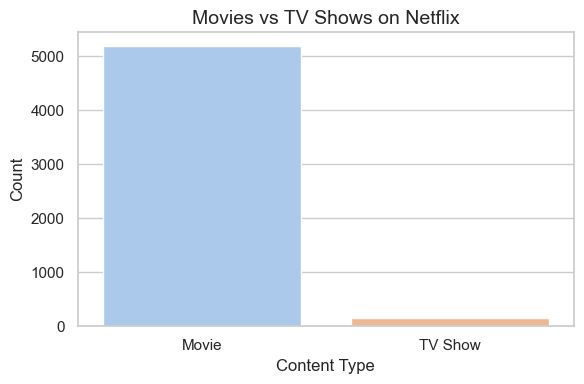

In [6]:
plt.figure(figsize=(6, 4))
df['type'] = df['type'].astype('category')

# Assign 'type' to both x and hue, disable legend
sns.countplot(data=df, x='type', hue='type', palette='pastel', legend=False)

plt.title("Movies vs TV Shows on Netflix", fontsize=14)
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(f"{desktop_path}/netflix_type_count.png")
plt.show()


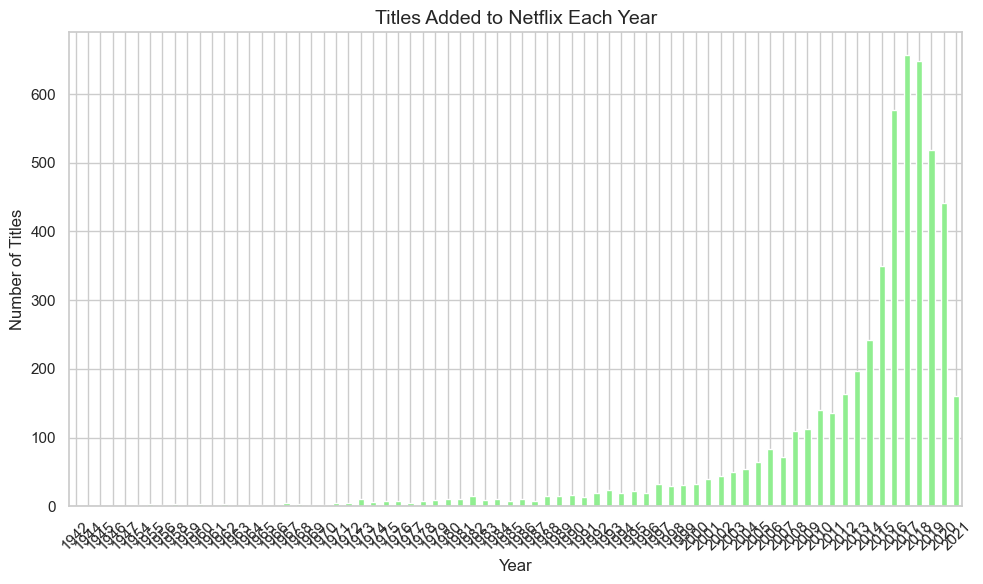

In [9]:
plt.figure(figsize=(10, 6))
df['release_year'] = df['release_year'].astype(str)
df['release_year'] = pd.Categorical(df['release_year'], ordered=True, categories=sorted(df['release_year'].unique()))
df['release_year'].value_counts().sort_index().plot(kind='bar', color='lightgreen')

plt.title("Titles Added to Netflix Each Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{desktop_path}/netflix_yearly_additions.png")
plt.show()


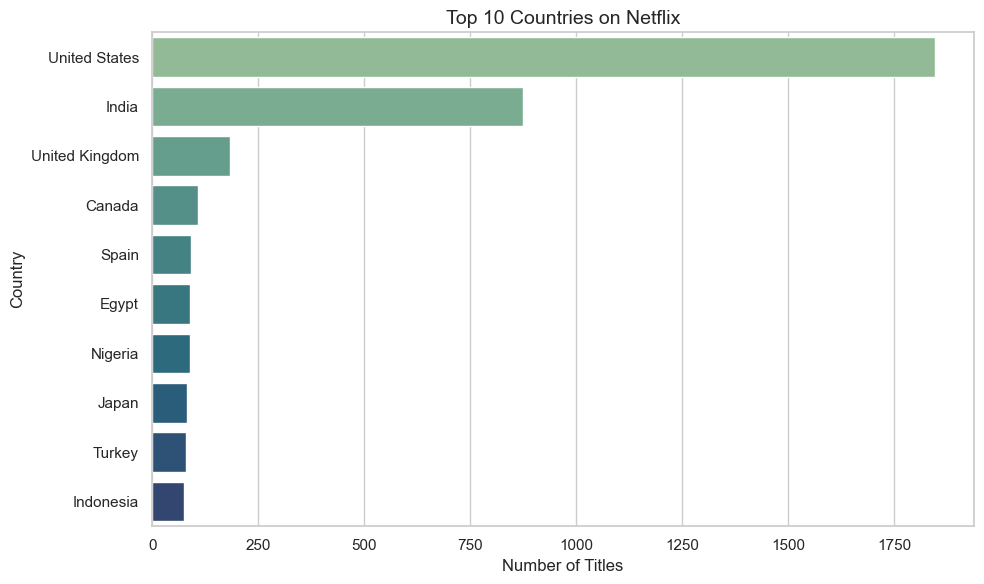

In [10]:
top_countries = df['country'].value_counts().head(10)
country_df = top_countries.reset_index()
country_df.columns = ['country', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=country_df, x='count', y='country', hue='country', palette='crest', legend=False)

plt.title("Top 10 Countries on Netflix", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig(f"{desktop_path}/netflix_top_countries.png")
plt.show()


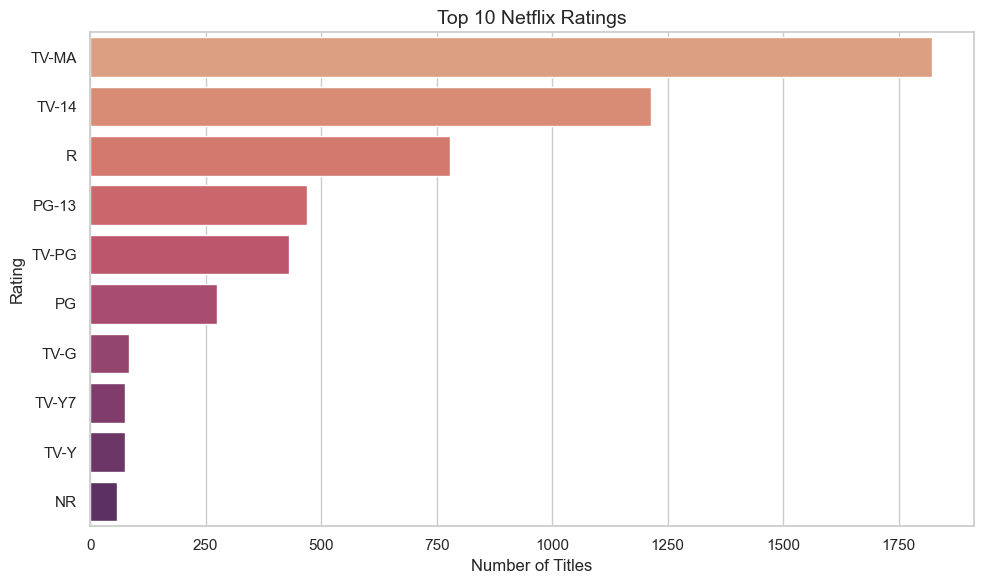

In [11]:
top_ratings = df['rating'].value_counts().head(10)
rating_df = top_ratings.reset_index()
rating_df.columns = ['rating', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=rating_df, x='count', y='rating', hue='rating', palette='flare', legend=False)

plt.title("Top 10 Netflix Ratings", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.tight_layout()
plt.savefig(f"{desktop_path}/netflix_rating_distribution.png")
plt.show()


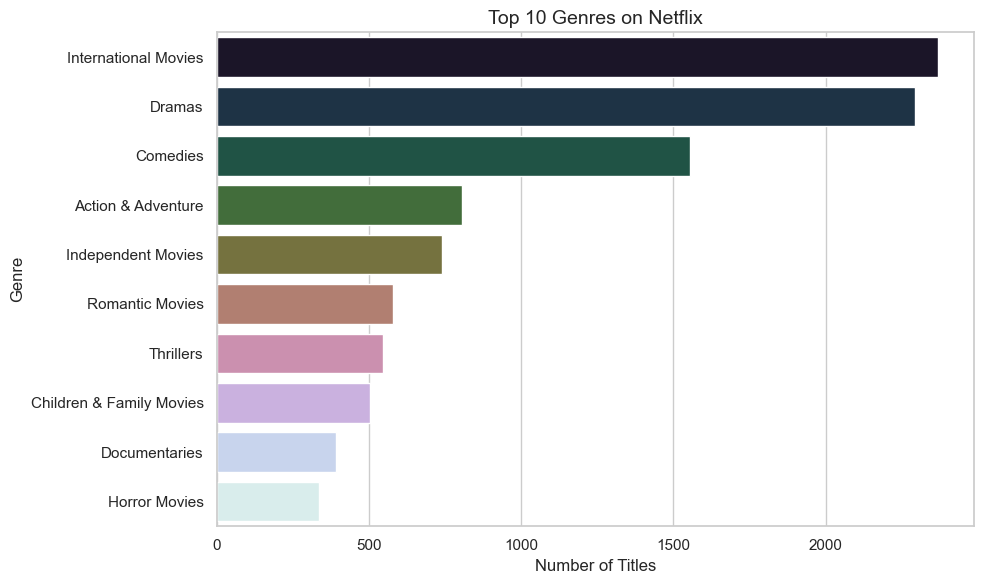

In [12]:
genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genres for genre in sublist]
genre_counts = pd.Series(Counter(flat_genres)).sort_values(ascending=False).head(10)
genre_df = genre_counts.reset_index()
genre_df.columns = ['genre', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_df, x='count', y='genre', hue='genre', palette='cubehelix', legend=False)

plt.title("Top 10 Genres on Netflix", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.savefig(f"{desktop_path}/netflix_top_genres.png")
plt.show()


In [13]:
image_files = [
    "netflix_type_count.png",
    "netflix_yearly_additions.png",
    "netflix_top_countries.png",
    "netflix_rating_distribution.png",
    "netflix_top_genres.png"
]

images = [Image.open(f"{desktop_path}/{img}").convert('RGB') for img in image_files]
images[0].save(f"{desktop_path}/netflix_dashboard_summary.pdf", save_all=True, append_images=images[1:])

print("✅ All charts saved and dashboard PDF created on your Desktop.")


✅ All charts saved and dashboard PDF created on your Desktop.


INSIGHTS AND INTERPRETATION

1. Top trends discovered
- Netflix steadily increased its content until 2020, which had the highest number of new additions.
- A notable surge in content occurred during 2018–2020, likely due to increased global investment and the COVID-19 pandemic.
- Movies are more common than TV shows on Netflix, but the gap is gradually narrowing.

2. Countries that dominate Netflix content
- The United States leads in content production.
- India ranks second, followed by United Kingdom and Canada.
- South Korea and other non-English countries also contribute significantly, showing Netflix’s global focus.

3. Content or genres that are most popular
- Top genres include:
  - Dramas
  - Comedies
  - International Movies
  - Documentaries
  - Children & Family Movies
- Other notable genres are Stand-Up Comedy, Thrillers, and Romantic Movies, indicating a balanced offering of entertainment content.

4. What do the ratings tell us?
- The most frequent ratings are:
  - TV-MA (Mature Audiences)
  - TV-14
  - TV-PG
  - R
- This shows that Netflix mainly targets adult and teen viewers, with a smaller share of content suitable for younger audiences.

5. Duration of Movies
- Most movies range between 80–120 minutes.
- There are very few extremely short or very long films, indicating a standard viewing experience tailored for average users.

6. Surprising Findings
- India has a very strong presence in the dataset, especially for TV Shows.
- High visibility of international and multilingual content confirms Netflix's strategy of localized production.
- Although Documentaries and Educational genres are included, they are still underrepresented.

 Recommendations
- Expand Family-Friendly Content: Invest in G-rated and PG-rated content to attract younger audiences.
- Enhance Regional Diversity: Explore more localized content in emerging regions like Africa and Latin America.
- Balance the Genre Mix: Increase underrepresented categories such as Sci-Fi, Historical, and Educational shows.

